# The Relationship Between Economic Growth and Quality of Life

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Dataframe Setup:

In [81]:
url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/world_happiness_report_2020.csv"
df = pd.read_csv(url)
df

,Country,Year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,2014,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217,0.725214,0.239111
1700,Zimbabwe,2015,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457,0.715079,0.178861
1701,Zimbabwe,2016,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612,0.737636,0.208555
1702,Zimbabwe,2017,3.638300,7.549491,0.754147,55.000000,0.752826,-0.069670,0.751208,0.806428,0.224051


In [82]:
df.columns

Index(['Country', 'Year', 'Life_Ladder', 'Log_GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy_at_birth',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption', 'Positive_affect', 'Negative_affect'],
      dtype='object')

In [83]:
df = df.rename(columns={"Life_Ladder":"Happiness",
                      "Log_GDP_per_capita":"Wealth",
                      "Social_support":"Social support",
                      "Healthy_life_expectancy_at_birth":"Life expectancy",
                      "Freedom_to_make_life_choices":"Freedom",
                      "Perceptions_of_corruption":"Corruption perceptions",
                      "Positive_affect":"Positive affect",
                      "Negative_affect":"Negative affect"})
df = df.dropna()
nec_columns = ["Happiness", "Wealth", "Life expectancy"]
df = df[nec_columns]
df

,Happiness,Wealth,Life expectancy
0,3.723590,7.168690,50.799999
1,4.401778,7.333790,51.200001
2,4.758381,7.386629,51.599998
3,3.831719,7.415019,51.919998
4,3.782938,7.517126,52.240002
...,...,...,...
1699,4.184451,7.562753,52.380001
1700,3.703191,7.556052,53.799999
1701,3.735400,7.538829,54.400002
1702,3.638300,7.549491,55.000000


### Objective:
Decide the project objective(s): What do you want to tell using the data?


**My Objective**
- To investigate the relationship between economic prosperity (measured by wealth) and subjective well-being (happiness) and mortality rates (life expectancy), with the aim of identifying the direction and strength of the associations between these variables.


**My hypothesis:**
- I think that there will be a positive and statistically significant correlation between wealth and happiness, such that an increase in wealth will be associated with higher levels of happiness.
- Additionally, I expect that there will be a positive and statistically significant correlation between wealth and life expectancy, such that an increase in wealth will be associated with longer life expectancy.


### Metadata:
num of entries, features, value ranges, etc...

In [84]:
# num of entries
num_entries = df.shape[0]
print(f"The dataset contains {num_entries} entries.")

The dataset contains 1512 entries.


In [85]:
statsdf = pd.DataFrame([df.mean(), df.std(), df.min(), df.max(), df.quantile(0.25), df.quantile(0.5), df.quantile(0.75)], columns=df.columns, index=['mean', 'sd', 'min', 'max', '25%', '50%', '75%'])
statsdf

,Happiness,Wealth,Life expectancy
mean,5.409960,9.171052,62.959863
sd,1.136302,1.185701,7.760143
min,2.661718,6.457201,32.299999
max,7.970892,11.670484,76.500000
25%,4.556063,8.223155,57.700001
50%,5.304165,9.364146,64.910000
75%,6.210087,10.131858,68.400002


### Non-trivial Information:
What can you say from the data? Any interesting data trends that cannot be easily guessed or can be used to justify some hypothesis?

In [ ]:
# correlation matrix
cor = df.corr()
cor

,Happiness,Wealth,Life expectancy
Happiness,1.000000,0.777013,0.744753
Wealth,0.777013,1.000000,0.847845
Life expectancy,0.744753,0.847845,1.000000


### Visualization:
Visualize the data (at least TWO types of meaningful plots)

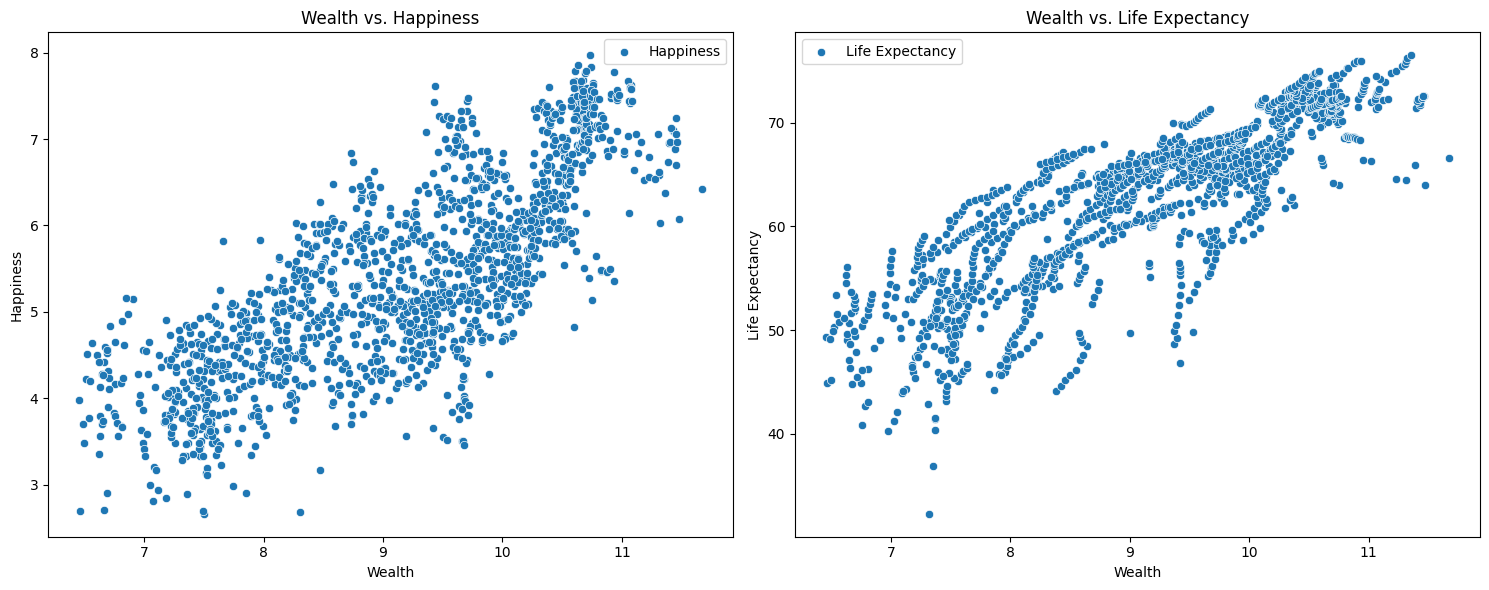

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.scatterplot(ax=axs[0], x="Wealth", y="Happiness", data=df, label="Happiness")
axs[0].set_title("Wealth vs. Happiness")
axs[0].set_xlabel("Wealth")
axs[0].set_ylabel("Happiness")

sns.scatterplot(ax=axs[1], x="Wealth", y="Life expectancy", data=df, label="Life Expectancy")
axs[1].set_title("Wealth vs. Life Expectancy")
axs[1].set_xlabel("Wealth")
axs[1].set_ylabel("Life Expectancy")

plt.tight_layout()
plt.legend()
plt.show()

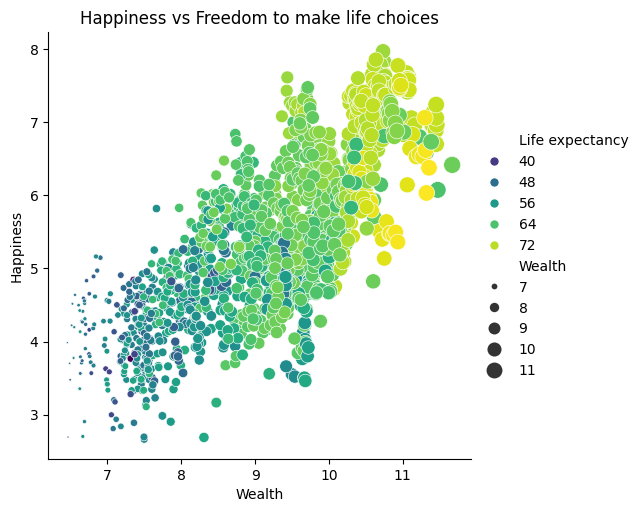

In [ ]:
sns.relplot(
    data=df,
    x="Wealth",
    y="Happiness",
    size="Wealth",
    sizes=(2,150),
    hue="Life expectancy",
    palette="viridis"
)
plt.title("");